In [115]:
## Overview:
## In this project death number due to different disease is given for years between 1990 to 2019.
## I am taking years target variable. First I will work to analyse death due do different health condition every year and how death effects is increasig or decreasing with time. variable.
## I am workig to find corelation between years and death due to disease.

In [116]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [117]:
df= pd.read_csv("cause_of_deaths dataset.csv")

In [118]:
df

,Country/Territory,Code,Year,Meningitis,Alzheimers Disease and Other Dementias,Parkinsons Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [119]:
## We can see there are 6120 rows and 33 columns.
df.shape

(6120, 34)

In [120]:
## We can see there is no null value i the above data....
df.describe()

,Year,Meningitis,Alzheimers Disease and Other Dementias,Parkinsons Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [121]:
##It seems there is no missing values in df. Lets check null value of each columns.
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimers Disease and Other Dementias        0
Parkinsons Disease                            0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [122]:
## I am removing code as it is not going to impact any of the analytical part. 
df=df.drop("Code", axis=1) 
df=df.drop("Country/Territory", axis=1)

In [123]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Year,Meningitis,Alzheimers Disease and Other Dementias,Parkinsons Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,2015,1439,754,215,3019,2518,770,1302,1355,29162,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,2016,1457,767,219,3056,2050,801,1342,1338,27141,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,2017,1460,781,223,2990,2116,818,1363,1312,24846,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,2018,1450,795,227,2918,2088,825,1396,1294,22106,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [124]:
df

,Year,Meningitis,Alzheimers Disease and Other Dementias,Parkinsons Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,2015,1439,754,215,3019,2518,770,1302,1355,29162,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,2016,1457,767,219,3056,2050,801,1342,1338,27141,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,2017,1460,781,223,2990,2116,818,1363,1312,24846,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,2018,1450,795,227,2918,2088,825,1396,1294,22106,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [125]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Year", axis=1)
y=df['Year']

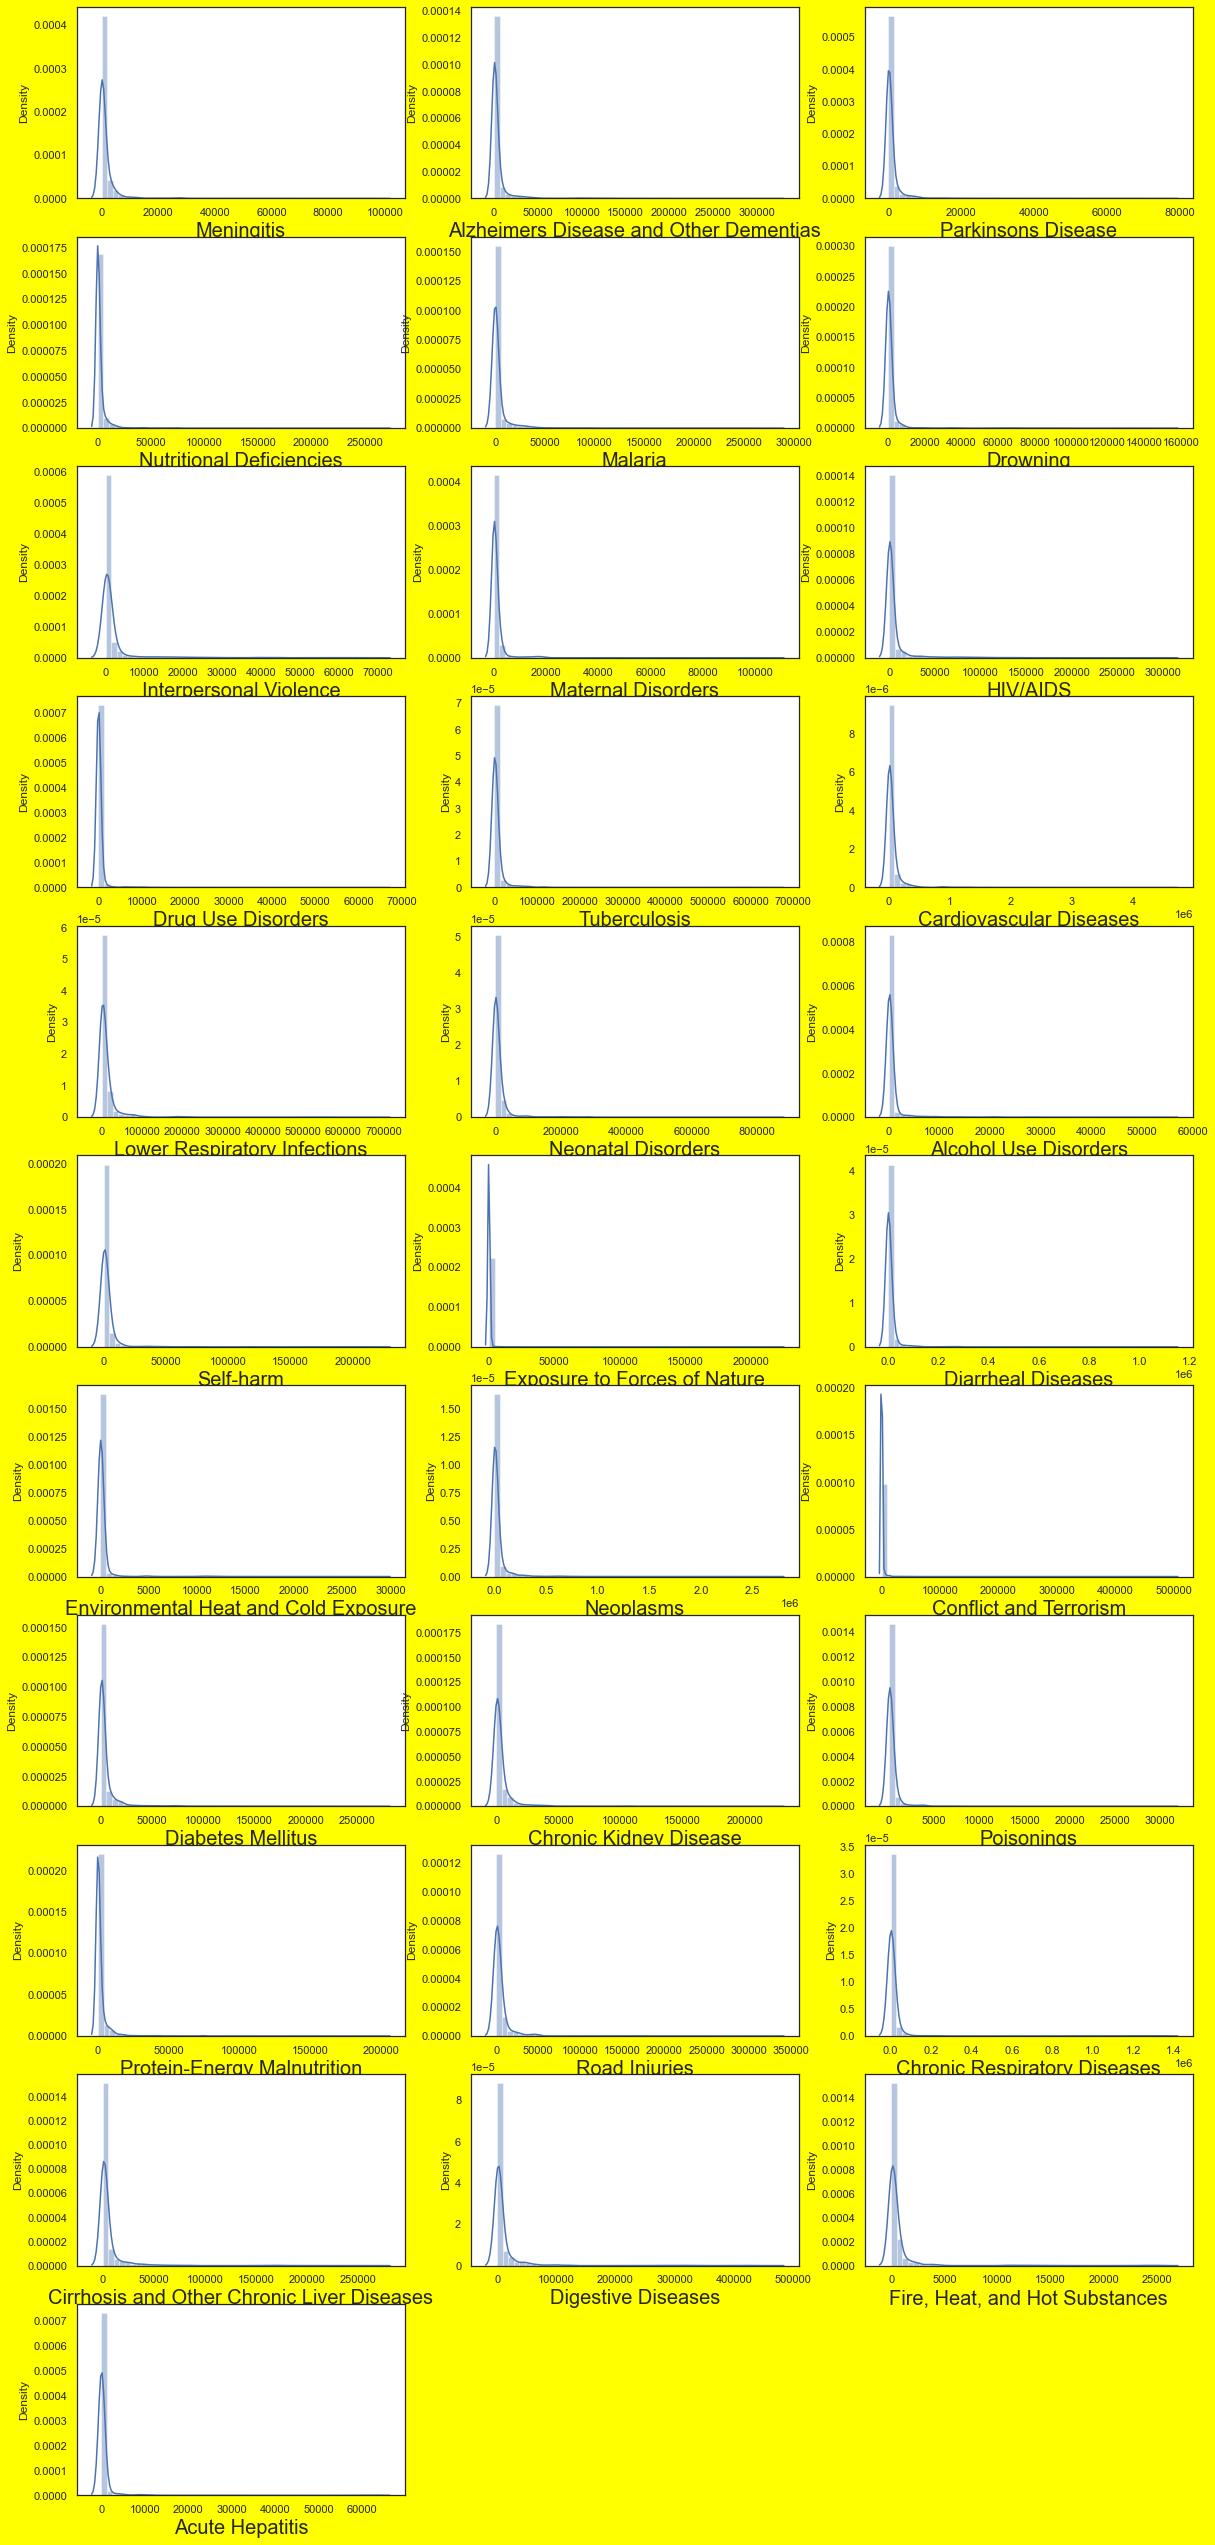

In [126]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [127]:
df.skew()

Year                                           0.000000
Meningitis                                     8.248599
Alzheimers Disease and Other Dementias         8.695288
Parkinsons Disease                             9.321242
Nutritional Deficiencies                      14.863496
Malaria                                        9.159105
Drowning                                      10.553901
Interpersonal Violence                         5.777146
Maternal Disorders                            12.278358
HIV/AIDS                                       6.610169
Drug Use Disorders                            13.367100
Tuberculosis                                  12.022406
Cardiovascular Diseases                        9.411914
Lower Respiratory Infections                   9.036604
Neonatal Disorders                            10.447536
Alcohol Use Disorders                          9.253511
Self-harm                                      8.973653
Exposure to Forces of Nature                  34

In [128]:
df['Meningitis']=np.sqrt(df['Meningitis'])
df['Alzheimers Disease and Other Dementias']=np.sqrt(df['Alzheimers Disease and Other Dementias'])
df['Parkinsons Disease']=np.sqrt(df['Parkinsons Disease'])
df['Nutritional Deficiencies']=np.sqrt(df['Alcohol Use Disorders'])
df['Malaria']=np.sqrt(df['Malaria'])
df['Drowning']=np.sqrt(df['Drowning'])
df['Interpersonal Violence']=np.sqrt(df['Interpersonal Violence'])
df['Maternal Disorders']=np.sqrt(df['Maternal Disorders'])
df['HIV/AIDS']=np.sqrt(df['HIV/AIDS'])
df['Drug Use Disorders']=np.sqrt(df['Drug Use Disorders'])
df['Tuberculosis']=np.sqrt(df['Tuberculosis'])
df['Cardiovascular Diseases']=np.sqrt(df['Cardiovascular Diseases'])
df['Lower Respiratory Infections']=np.sqrt(df['Lower Respiratory Infections'])
df['Neonatal Disorders']=np.sqrt(df['Neonatal Disorders'])
df['Alcohol Use Disorders']=np.sqrt(df['Alcohol Use Disorders'])
df['Self-harm']=np.sqrt(df['Self-harm'])
df['Exposure to Forces of Nature']=np.sqrt(df['Exposure to Forces of Nature'])
df['Diarrheal Diseases']=np.sqrt(df['Diarrheal Diseases'])
df['Environmental Heat and Cold Exposure']=np.sqrt(df['Environmental Heat and Cold Exposure'])
df['Neoplasms']=np.sqrt(df['Neoplasms'])
df['Conflict and Terrorism']=np.sqrt(df['Conflict and Terrorism'])
df['Diabetes Mellitus']=np.sqrt(df['Diabetes Mellitus'])
df['Chronic Kidney Disease']=np.sqrt(df['Chronic Kidney Disease'])
df['Poisonings']=np.sqrt(df['Poisonings'])
df['Protein-Energy Malnutrition']=np.sqrt(df['Protein-Energy Malnutrition'])
df['Road Injuries']=np.sqrt(df['Road Injuries'])
df['Chronic Respiratory Diseases']=np.sqrt(df['Chronic Respiratory Diseases'])
df['Cirrhosis and Other Chronic Liver Diseases']=np.sqrt(df['Cirrhosis and Other Chronic Liver Diseases'])
df['Digestive Diseases']=np.sqrt(df['Digestive Diseases'])
df['Fire, Heat, and Hot Substances']=np.sqrt(df['Fire, Heat, and Hot Substances'])
df['Acute Hepatitis']=np.sqrt(df['Acute Hepatitis'])

In [129]:
df.skew()

Year                                           0.000000
Meningitis                                     3.623856
Alzheimers Disease and Other Dementias         3.670370
Parkinsons Disease                             3.923261
Nutritional Deficiencies                       4.423139
Malaria                                        3.746532
Drowning                                       5.408523
Interpersonal Violence                         3.239779
Maternal Disorders                             4.389914
HIV/AIDS                                       3.132719
Drug Use Disorders                             6.441818
Tuberculosis                                   4.915504
Cardiovascular Diseases                        4.071868
Lower Respiratory Infections                   3.471864
Neonatal Disorders                             4.262987
Alcohol Use Disorders                          4.423139
Self-harm                                      4.959328
Exposure to Forces of Nature                  17

In [130]:
df['Meningitis']=np.sqrt(df['Meningitis'])
df['Alzheimers Disease and Other Dementias']=np.sqrt(df['Alzheimers Disease and Other Dementias'])
df['Parkinsons Disease']=np.sqrt(df['Parkinsons Disease'])
df['Nutritional Deficiencies']=np.sqrt(df['Alcohol Use Disorders'])
df['Malaria']=np.sqrt(df['Malaria'])
df['Drowning']=np.sqrt(df['Drowning'])
df['Interpersonal Violence']=np.sqrt(df['Interpersonal Violence'])
df['Maternal Disorders']=np.sqrt(df['Maternal Disorders'])
df['HIV/AIDS']=np.sqrt(df['HIV/AIDS'])
df['Drug Use Disorders']=np.sqrt(df['Drug Use Disorders'])
df['Tuberculosis']=np.sqrt(df['Tuberculosis'])
df['Cardiovascular Diseases']=np.sqrt(df['Cardiovascular Diseases'])
df['Lower Respiratory Infections']=np.sqrt(df['Lower Respiratory Infections'])
df['Neonatal Disorders']=np.sqrt(df['Neonatal Disorders'])
df['Alcohol Use Disorders']=np.sqrt(df['Alcohol Use Disorders'])
df['Self-harm']=np.sqrt(df['Self-harm'])
df['Exposure to Forces of Nature']=np.sqrt(df['Exposure to Forces of Nature'])
df['Diarrheal Diseases']=np.sqrt(df['Diarrheal Diseases'])
df['Environmental Heat and Cold Exposure']=np.sqrt(df['Environmental Heat and Cold Exposure'])
df['Neoplasms']=np.sqrt(df['Neoplasms'])
df['Conflict and Terrorism']=np.sqrt(df['Conflict and Terrorism'])
df['Diabetes Mellitus']=np.sqrt(df['Diabetes Mellitus'])
df['Chronic Kidney Disease']=np.sqrt(df['Chronic Kidney Disease'])
df['Poisonings']=np.sqrt(df['Poisonings'])
df['Protein-Energy Malnutrition']=np.sqrt(df['Protein-Energy Malnutrition'])
df['Road Injuries']=np.sqrt(df['Road Injuries'])
df['Chronic Respiratory Diseases']=np.sqrt(df['Chronic Respiratory Diseases'])
df['Cirrhosis and Other Chronic Liver Diseases']=np.sqrt(df['Cirrhosis and Other Chronic Liver Diseases'])
df['Digestive Diseases']=np.sqrt(df['Digestive Diseases'])
df['Fire, Heat, and Hot Substances']=np.sqrt(df['Fire, Heat, and Hot Substances'])
df['Acute Hepatitis']=np.sqrt(df['Acute Hepatitis'])

In [131]:
df.skew()

Year                                          0.000000
Meningitis                                    1.299003
Alzheimers Disease and Other Dementias        1.358838
Parkinsons Disease                            1.423126
Nutritional Deficiencies                      1.673870
Malaria                                       1.672654
Drowning                                      1.873461
Interpersonal Violence                        1.404999
Maternal Disorders                            1.315546
HIV/AIDS                                      1.520099
Drug Use Disorders                            2.056834
Tuberculosis                                  1.562662
Cardiovascular Diseases                       1.383326
Lower Respiratory Infections                  1.052089
Neonatal Disorders                            1.391167
Alcohol Use Disorders                         1.673870
Self-harm                                     1.704611
Exposure to Forces of Nature                  3.079450
Diarrheal 

In [132]:
## Let Normalize skewed continous data
from scipy.stats import skew
print(skew(df['Meningitis']))
print(skew(df['Alzheimers Disease and Other Dementias']))
print(skew(df['Parkinsons Disease']))
print(skew(df['Nutritional Deficiencies']))
print(skew(df['Malaria']))
print(skew(df['Drowning']))
print(skew(df['Interpersonal Violence']))
print(skew(df['Maternal Disorders']))
print(skew(df['HIV/AIDS']))
print(skew(df['Drug Use Disorders']))
print(skew(df['Tuberculosis']))
print(skew(df['Cardiovascular Diseases']))
print(skew(df['Lower Respiratory Infections']))
print(skew(df['Neonatal Disorders']))
print(skew(df['Alcohol Use Disorders']))
print(skew(df['Self-harm']))
print(skew(df['Exposure to Forces of Nature']))
print(skew(df['Diarrheal Diseases']))
print(skew(df['Environmental Heat and Cold Exposure']))
print(skew(df['Neoplasms']))
print(skew(df['Conflict and Terrorism']))
print(skew(df['Diabetes Mellitus']))
print(skew(df['Chronic Kidney Disease']))
print(skew(df['Poisonings']))
print(skew(df['Protein-Energy Malnutrition']))
print(skew(df['Road Injuries']))
print(skew(df['Chronic Respiratory Diseases']))
print(skew(df['Cirrhosis and Other Chronic Liver Diseases']))
print(skew(df['Digestive Diseases']))
print(skew(df['Fire, Heat, and Hot Substances']))
print(skew(df['Cirrhosis and Other Chronic Liver Diseases']))
print(skew(df['Acute Hepatitis']))

df

1.2986846876830722
1.3585048114599487
1.4227773765330944
1.6734599936985377
1.6722438403378972
1.8730014803061041
1.404655061579233
1.3152231240061993
1.51972646789338
2.0563294773891925
1.5622786331884961
1.3829873850923096
1.0518313836120592
1.390825691056035
1.6734599936985377
1.7041934591294388
3.0786956160185652
1.7074690644615875
1.713626073005258
1.48576179855406
2.249287923020002
1.273583522557465
1.2851508681457506
1.1506679991399191
1.2070602640137886
1.2784229774791886
2.2298588227513947
1.1442468274579711
1.166471238356925
0.9260501397827506
1.1442468274579711
1.9461031861831732


,Year,Meningitis,Alzheimers Disease and Other Dementias,Parkinsons Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,1990,6.816527,5.779843,4.388777,2.912951,3.105423,6.083873,6.262375,7.178210,2.414736,...,6.775910,7.803945,4.287747,6.732093,8.028171,8.780878,7.190345,8.411066,4.239363,7.391560
1,1991,6.862627,5.805566,4.397622,2.942831,3.707793,6.107054,6.688239,7.328860,2.530440,...,6.785533,7.811823,4.328394,6.784733,8.177592,8.819396,7.227051,8.458970,4.268591,7.456927
2,1992,7.053323,5.838503,4.409334,2.990698,3.931873,6.237800,6.924441,7.587887,2.632148,...,6.811786,7.838952,4.432480,7.002186,8.453182,8.881779,7.293678,8.546408,4.355877,7.593603
3,1993,7.282053,5.869656,4.426728,3.036370,3.223710,6.408830,7.133177,7.783879,2.735565,...,6.844766,7.883209,4.540433,7.272322,8.681728,8.959953,7.365421,8.638231,4.460913,7.746505
4,1994,7.417424,5.899104,4.446765,3.062814,3.811278,6.521682,7.305890,7.883720,2.817313,...,6.872661,7.918691,4.608336,7.424153,8.801484,9.035116,7.417424,8.703803,4.527019,7.859630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,2015,6.159071,5.240139,3.829214,2.632148,7.083762,5.267720,6.006932,6.067151,13.067856,...,7.507064,6.775910,4.418056,7.394653,6.979502,7.242236,6.650315,8.051263,5.013942,3.476068
6116,2016,6.178242,5.262582,3.846901,2.645751,6.728813,5.319957,6.052546,6.048031,12.835313,...,7.555637,6.817316,4.452441,7.417424,7.025372,7.266465,6.655409,8.080799,5.045378,3.476068
6117,2017,6.181419,5.286433,3.864348,2.659148,6.782330,5.347962,6.076087,6.018433,12.554925,...,7.586743,6.845546,4.466535,7.377280,7.051898,7.285934,6.693247,8.117503,5.057017,3.464102
6118,2018,6.170808,5.309967,3.881561,2.672345,6.759781,5.359367,6.112535,5.997684,12.193476,...,7.625377,6.879581,4.472136,7.332034,7.077423,7.305890,6.712341,8.133812,5.062807,3.433632


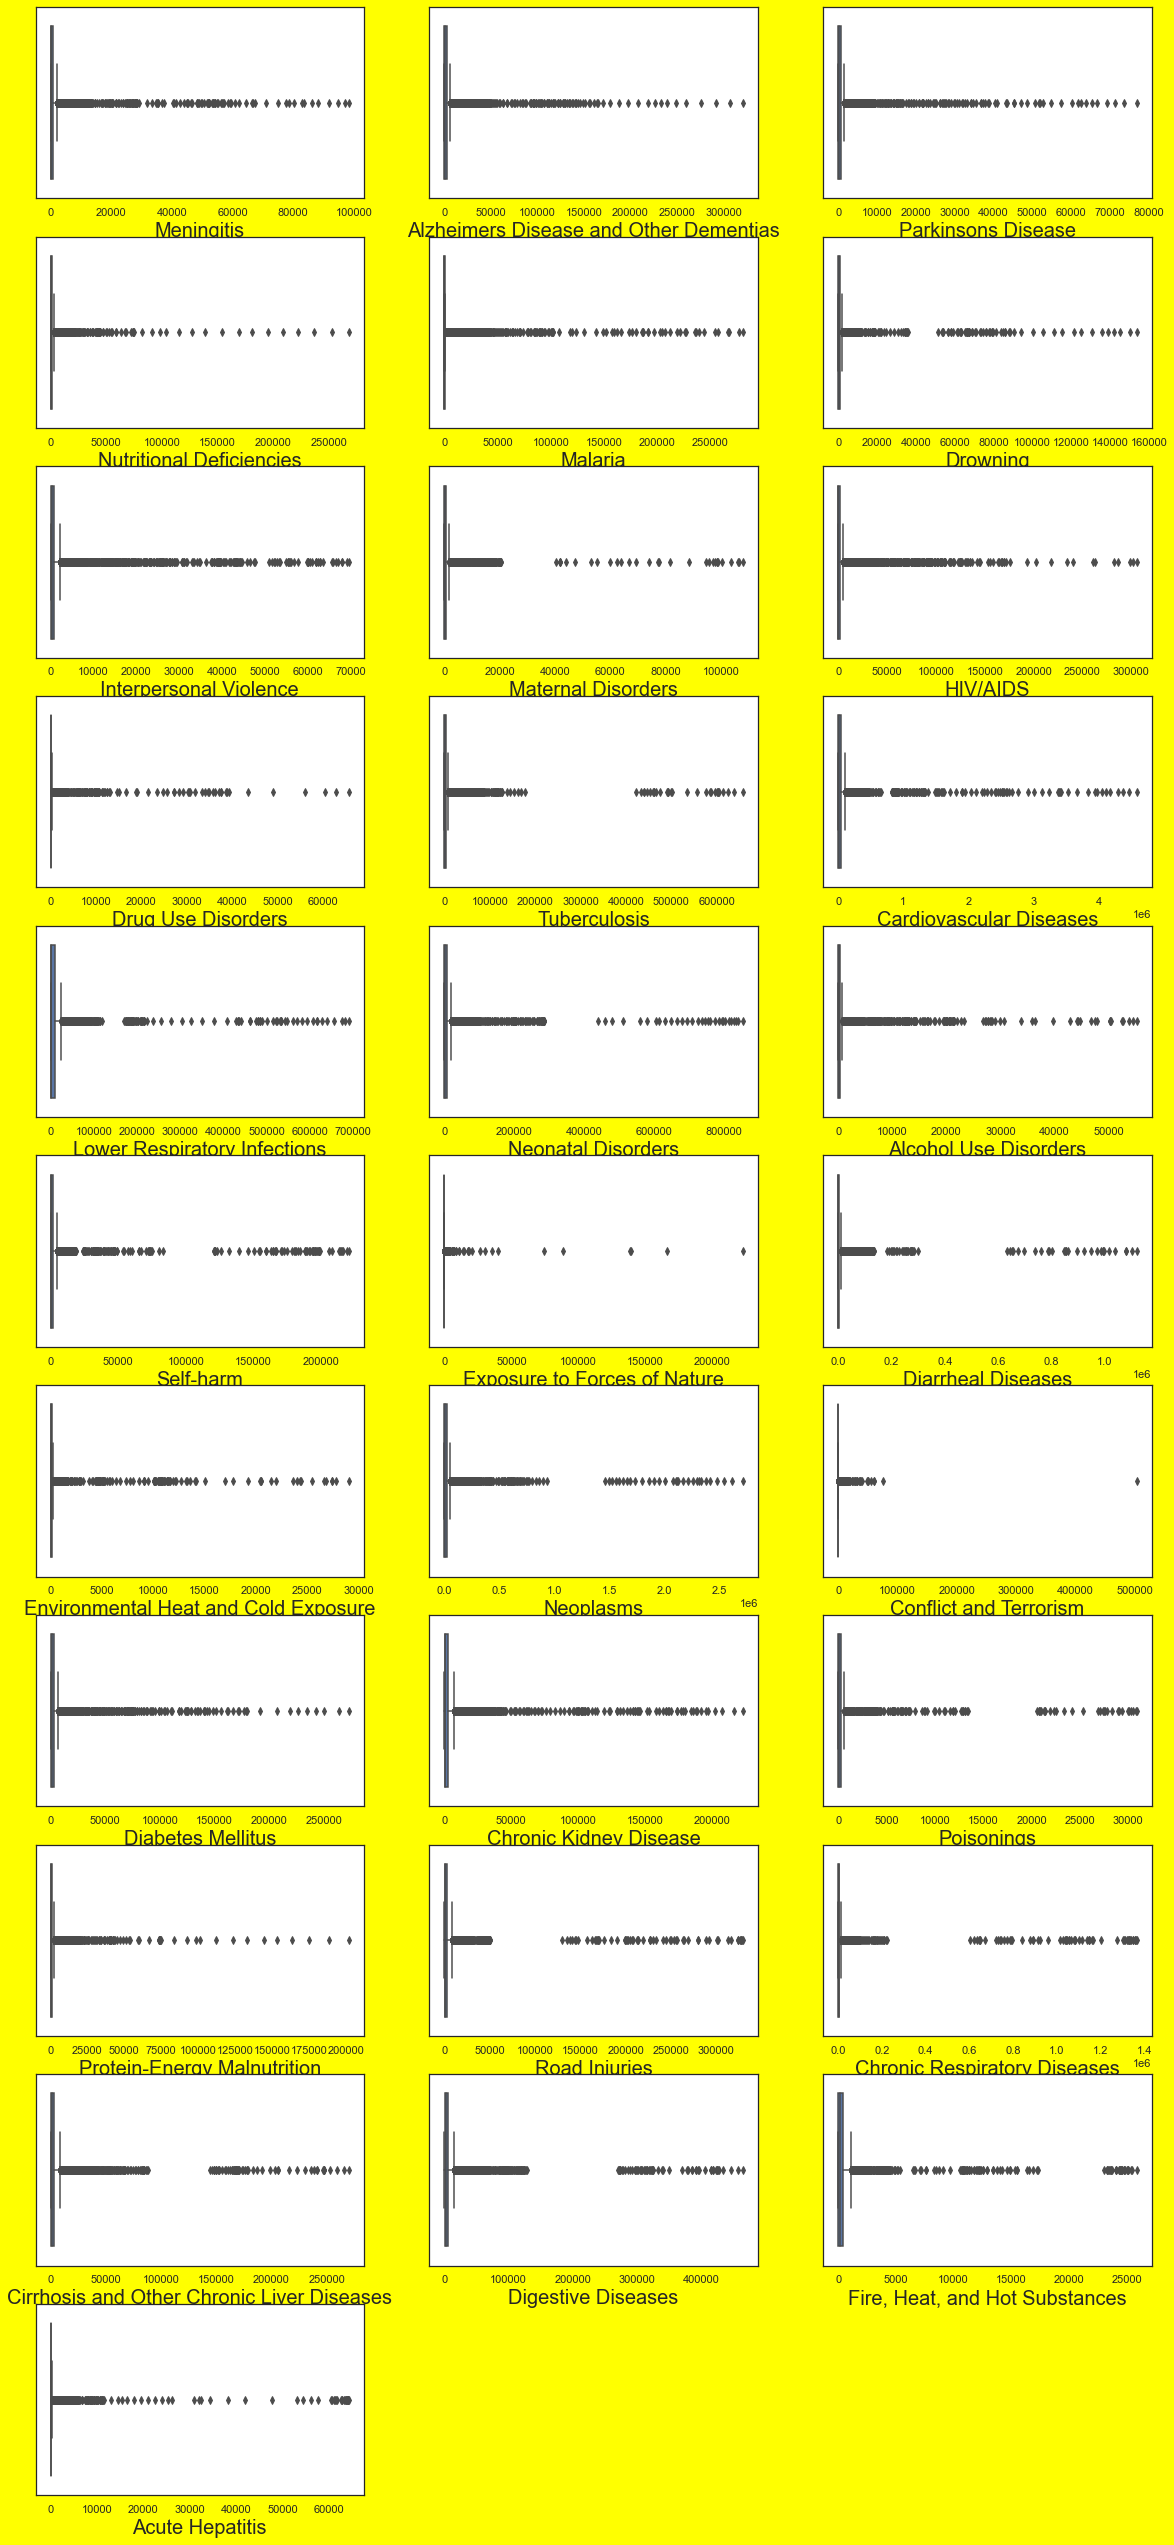

In [133]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [134]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   1,    4,    5, ..., 6106, 6107, 6108], dtype=int64),
 array([17, 21, 21, ...,  9,  9,  9], dtype=int64))

In [135]:
df= df[(z<3).all(axis=1)]
df.shape

(5533, 32)

In [140]:
## Since data loss is less than 15% I am acceptig this.
Data_loss=((6120-5533)/6120)*100
Data_loss

9.591503267973858

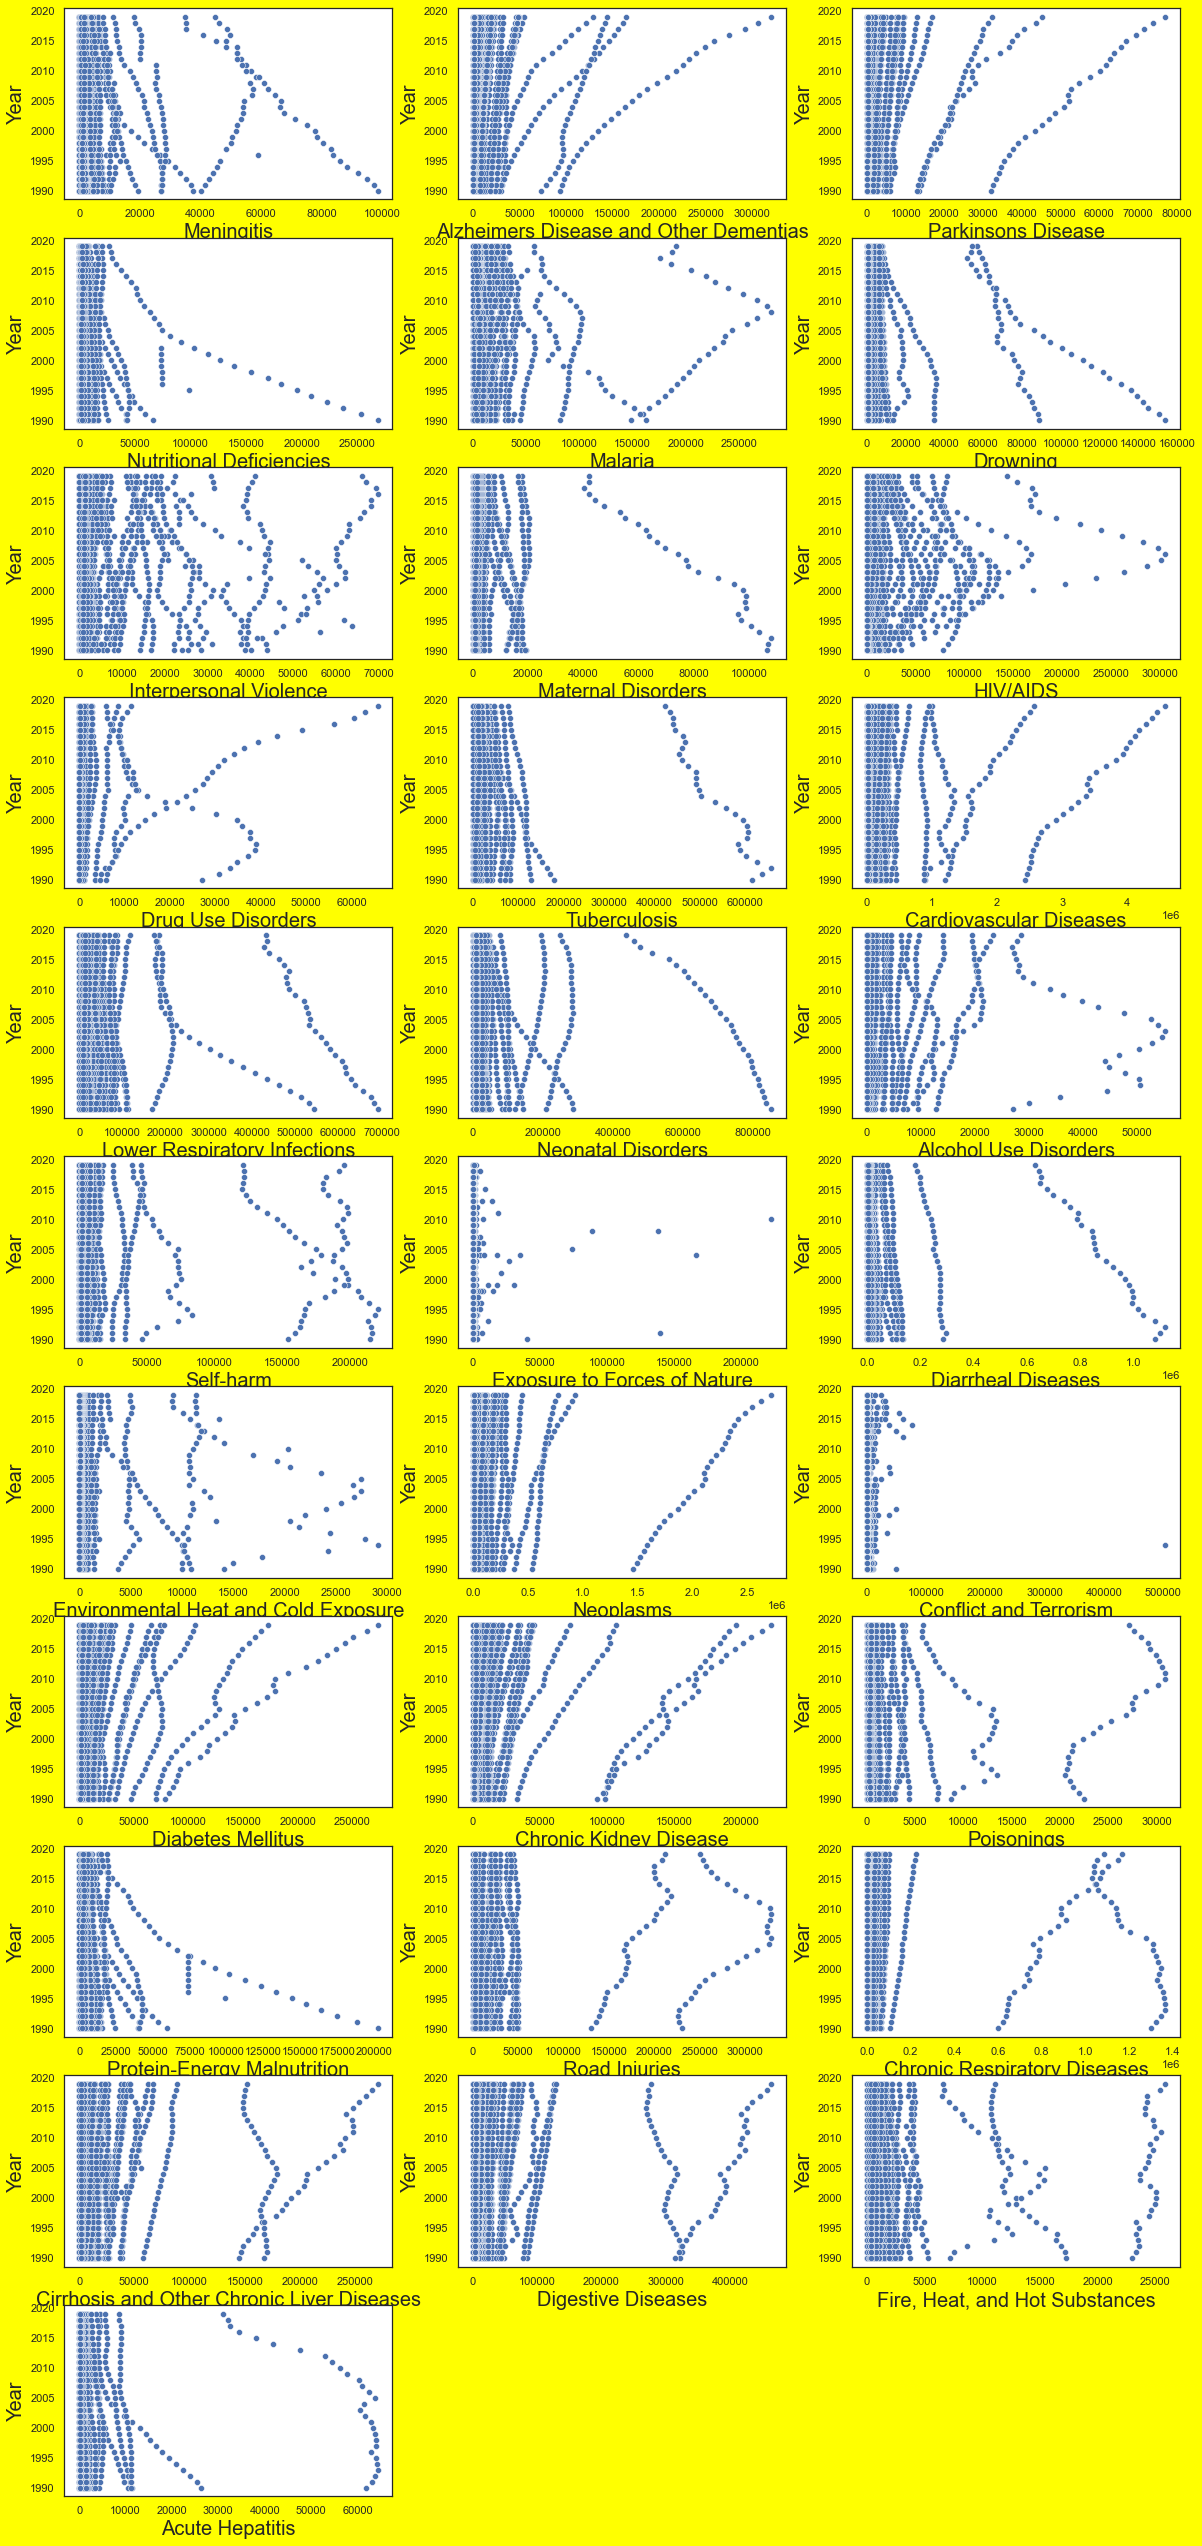

In [141]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=20)
        
        plt.ylabel('Year',fontsize=20)
        plotnumber+=1
        
plt.show()

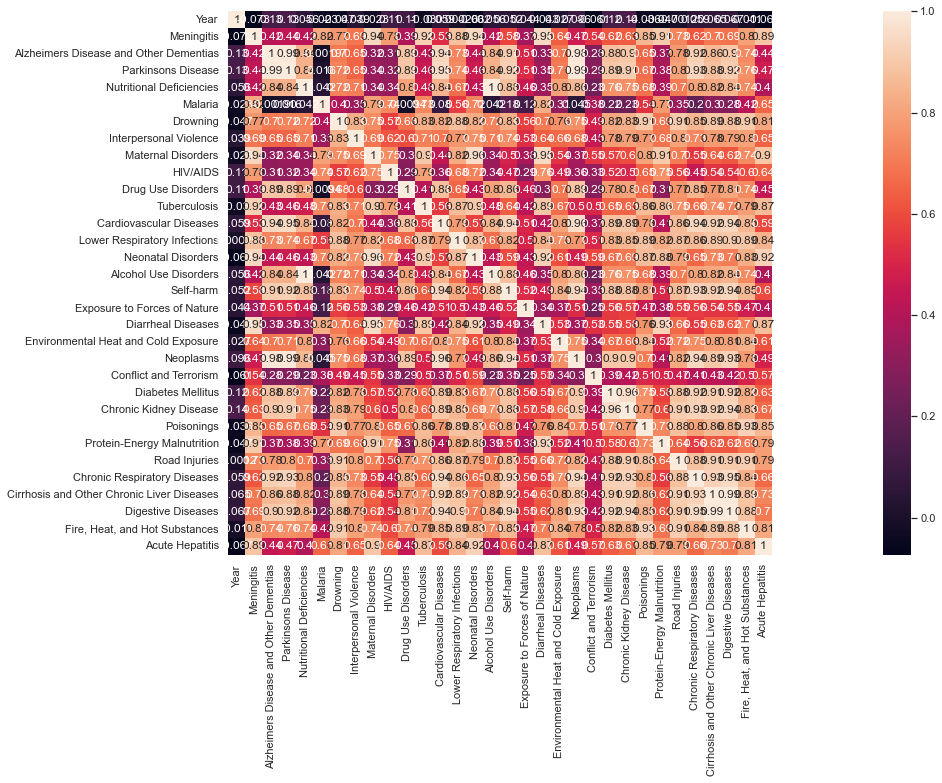

In [230]:
plt.figure(figsize=(40, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

Max value 12.000144673309608


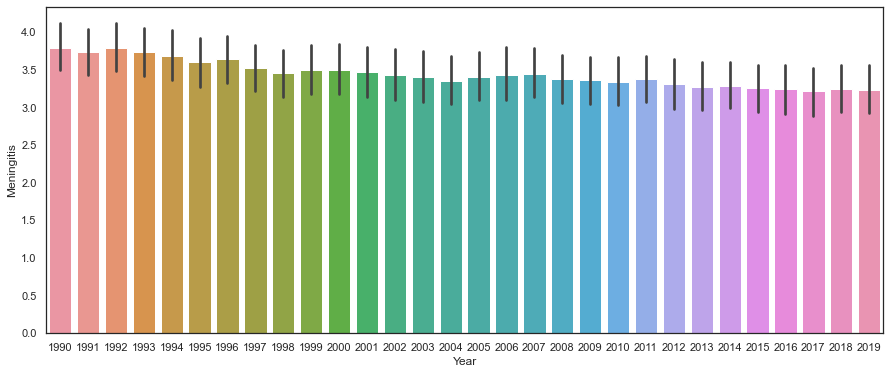

In [143]:
## Lets check Death number due to different disease every year since 1990 to 2019. And number of death till now due to a particular disease.

fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Meningitis', data = df)

print('Max value',df['Meningitis'].max())

In [144]:
##  Meningitis is a bacterial or viral infection of the fluid surrounding the brain and spinal cord usually causes the swelling.
##  we can see Death due to Meningitis is slightly decreasing with years.

Max value 15.325891477260322


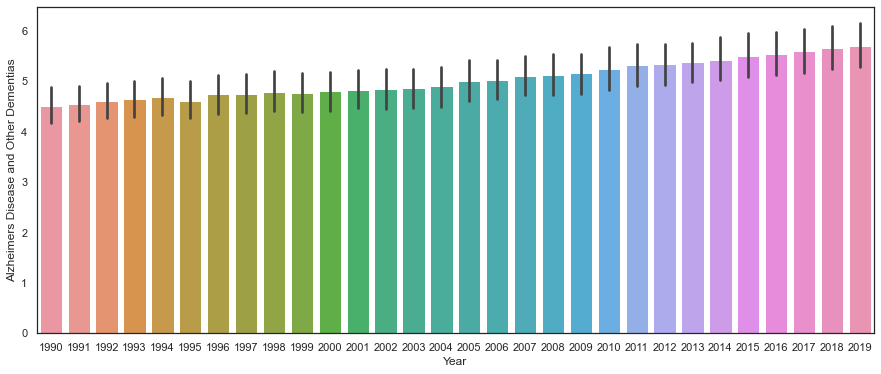

In [145]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Alzheimers Disease and Other Dementias', data = df)
print('Max value',df['Alzheimers Disease and Other Dementias'].max())

In [146]:
## Alzheimer´s disease is a progressive, neurodegenerative disorder that causes disorientation and behavioral changes, and obstructs memory, thinking, and judgment.
## Alzheimer´s disease is slightly increasing along with years .

Max value 15.505900258752456


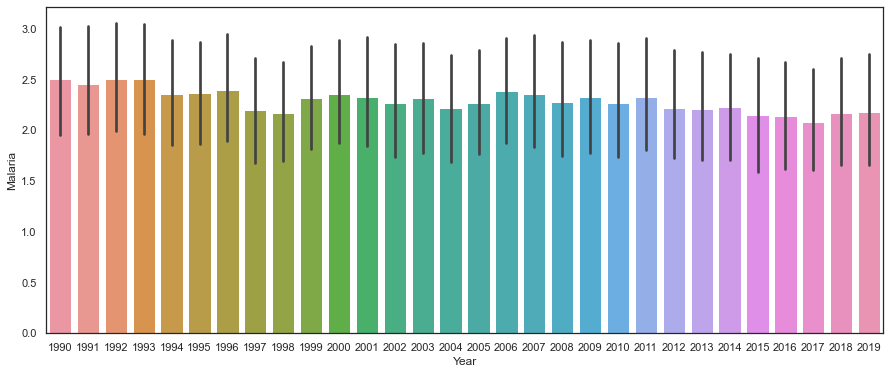

In [147]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Malaria', data = df) 
print('Max value',df['Malaria'].max())

In [148]:
## Malaria is a disease caused by a parasite. The parasite is spread to humans through the bites of infected mosquitoes. People who have malaria usually feel very sick with a high fever and shaking chills.
## We can there is proper increase or decrease in death due to Maleria along with years. 

Min value 0.0
Max value 10.652138619972149


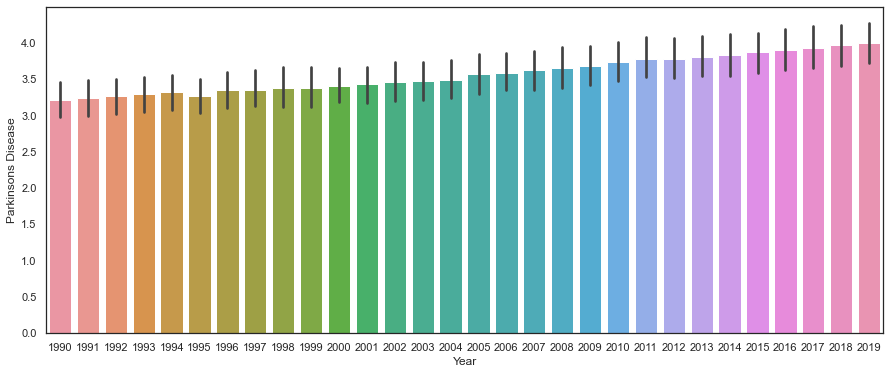

In [149]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Parkinsons Disease', data = df)
print('Min value',df['Parkinsons Disease'].min())
print('Max value',df['Parkinsons Disease'].max())

In [150]:
## Parkinson's disease is a progressive disorder that affects the nervous system and the parts of the body controlled by the nerves. 
## Parkinson's disease is continously increasing along with years.

Min value 0.0
Max value 9.567776122525363


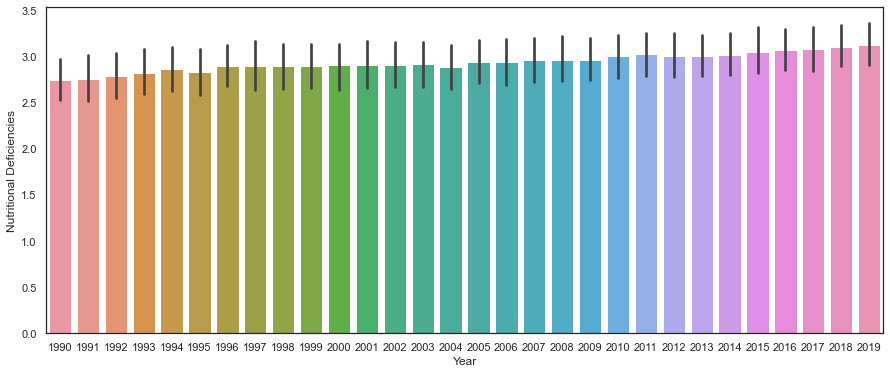

In [151]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Nutritional Deficiencies', data = df) 
print('Min value',df['Nutritional Deficiencies'].min())
print('Max value',df['Nutritional Deficiencies'].max())

In [152]:
## Nutritional deficiency occurs when the body is not getting enough nutrients such as vitamins and minerals.
## We can see Nutritional deficiency count is slightly decreasing along with years maybe due to incease in fertilizers, pesticides and iseciside 
## other reason can be continously increse in population every year due to which there is a probability of nutrition deficiency.

Max value 11.138424455647513


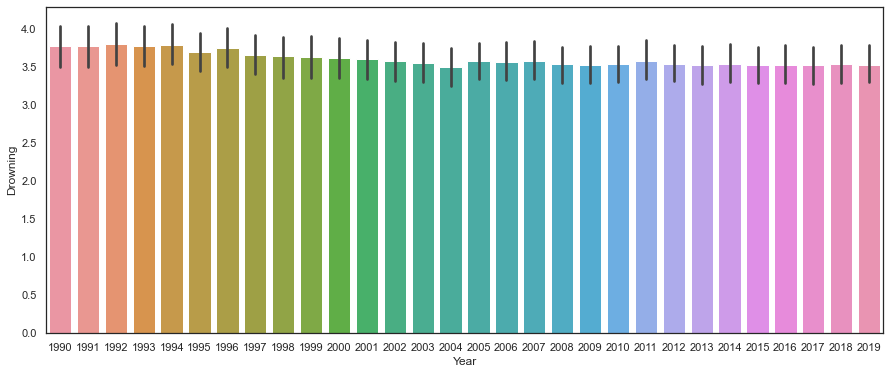

In [153]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Drowning', data = df) 
print('Max value',df['Drowning'].max())

In [154]:
## Drowning is the process of experiencing respiratory impairment from submersion or immersion in liquid.
## Drowning decreases along with years.

Max value 12.53250499112213


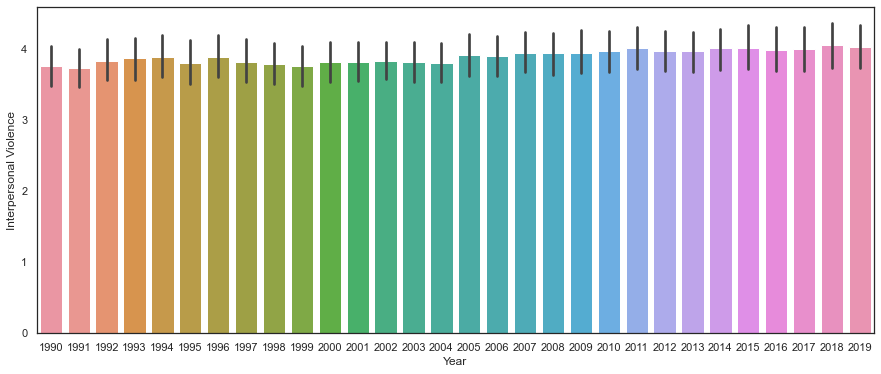

In [155]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Interpersonal Violence', data = df) 
print('Max value',df['Interpersonal Violence'].max())

In [156]:
## Interpersonal Violence has slightly increased along with years from 1991 to 2004 and after that it has become constant.

Max value 10.645306407354582


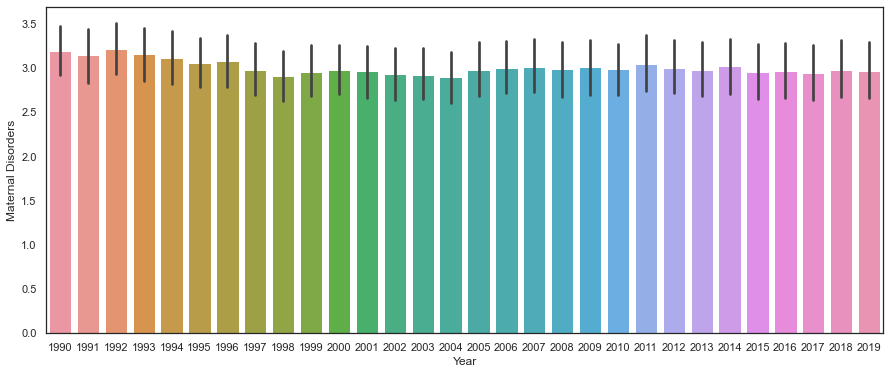

In [157]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Maternal Disorders', data = df) 
print('Max value',df['Maternal Disorders'].max())

In [158]:
## Maternal health refers to the health of women during pregnancy, childbirth and the postnatal period.
## The main factors that prevent women from receiving or seeking care during pregnancy and childbirth are:
##poverty,distance to facilities,lack of information,inadequate and poor quality services,cultural beliefs and practices.
## To improve maternal health, barriers that limit access to quality maternal health services must be identified and addressed at both health system and societal levels.
## As per the give set of data we can see death due to Maternal health issue has dacreased along ith time.

Max value 16.75997548310888


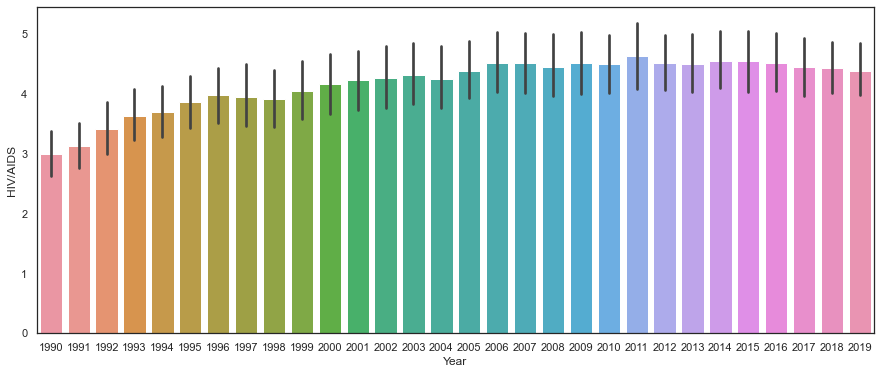

In [159]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'HIV/AIDS', data = df) 
print('Max value',df['HIV/AIDS'].max())


In [160]:

## Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV).
## By damaging your immune system, HIV interferes with your body's ability to fight infection and disease
## We can see since 1990 HIV/ AIDS death rates has increased significantly till 2015 and since 2016 it has started falling down every year.
## The reason could be medical advancement and continous awareness.

Max value 7.827508845613754


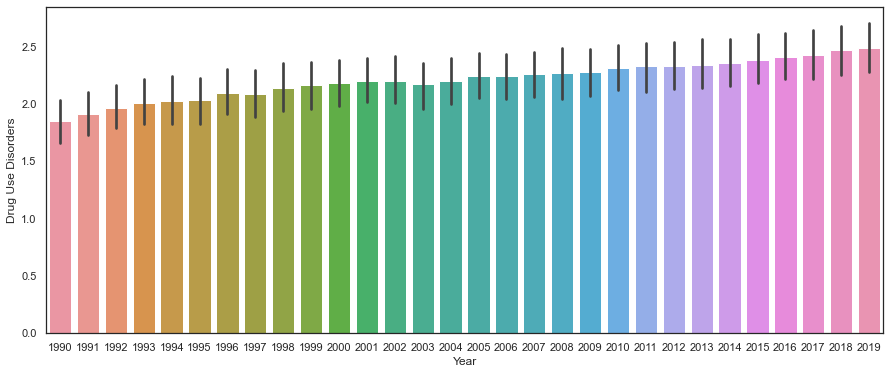

In [161]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Drug Use Disorders', data = df) 
print('Max value',df['Drug Use Disorders'].max())

In [162]:
##Drug addiction, also called substance use disorder, is a disease that affects a person's brain and behavior and leads to an inability to control the use of a legal or illegal drug or medicine.
## Drug Use Disorders has increased significantly from 1990 to 2019.Reson might be Family history of addiction, Mental health disorder,Peer pressure,Lack of family involvement,Early use,Taking a highly addictive drug.

Max value 15.287621150550136


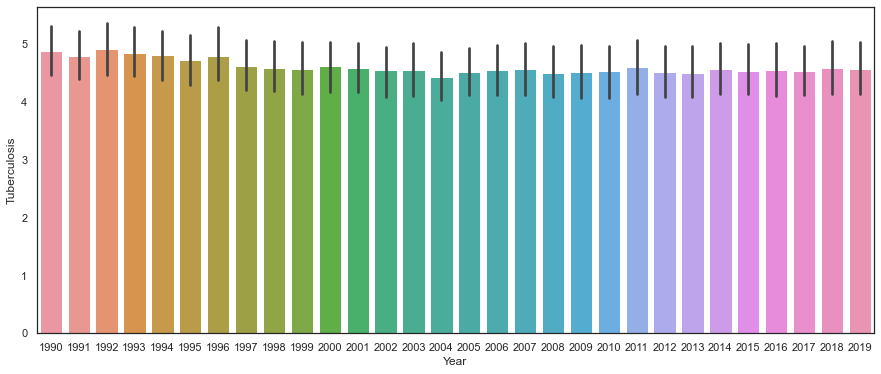

In [163]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Tuberculosis', data = df) 
print('Max value',df['Tuberculosis'].max())

In [164]:
##Tuberculosis (TB) is a potentially serious infectious disease that mainly affects the lungs. The bacteria that cause tuberculosis are spread from person to person through tiny droplets released into the air via coughs and sneezes.
## death due to Tuberculosis (TB) has decresed with time.

Max value 25.975985182897492


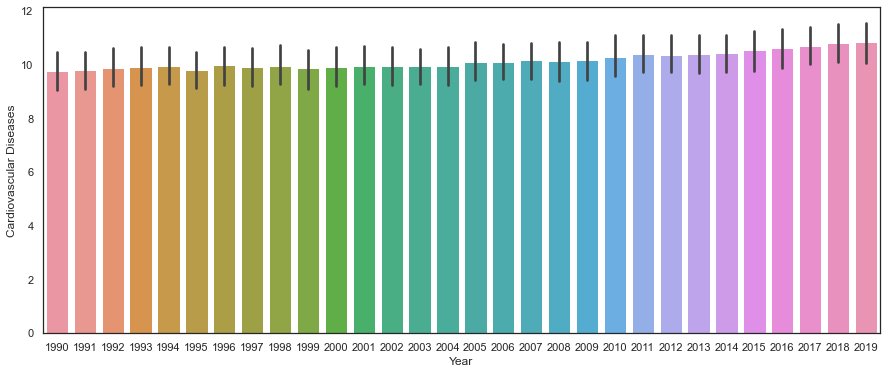

In [165]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Cardiovascular Diseases', data = df)
print('Max value',df['Cardiovascular Diseases'].max())


In [166]:
## Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots.
## As per data we can see there is growth in death rate since 1990 to 2019. The most important risk factors of heart disease and stroke can be  unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol.

Max value 16.780594507699266


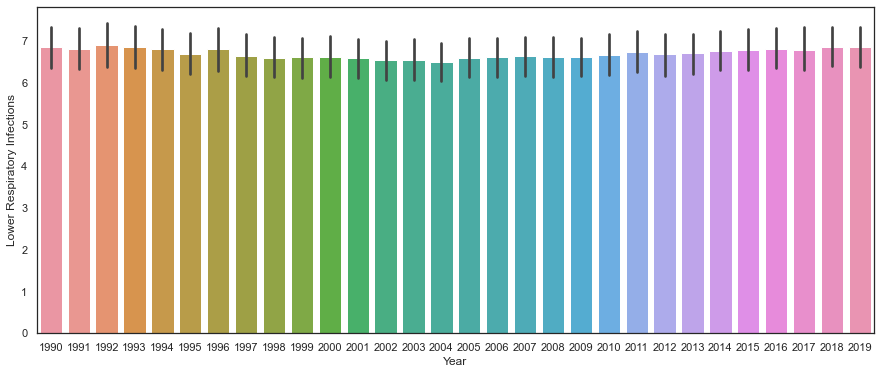

In [167]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Lower Respiratory Infections', data = df)
print('Max value',df['Lower Respiratory Infections'].max())

In [168]:
## Lower respiratory tract infection (LRTI) is a broad terminology which includes acute bronchitis, pneumonia, acute exacerbations of chronic obstructive pulmonary disease/chronic bronchitis (AECB), and acute exacerbation of bronchiectasis.
## Death due to Lower respiratory infection is decreasing along with years and number became stable in last 3 months.

Min value 0.0
Max value 17.814628629087252


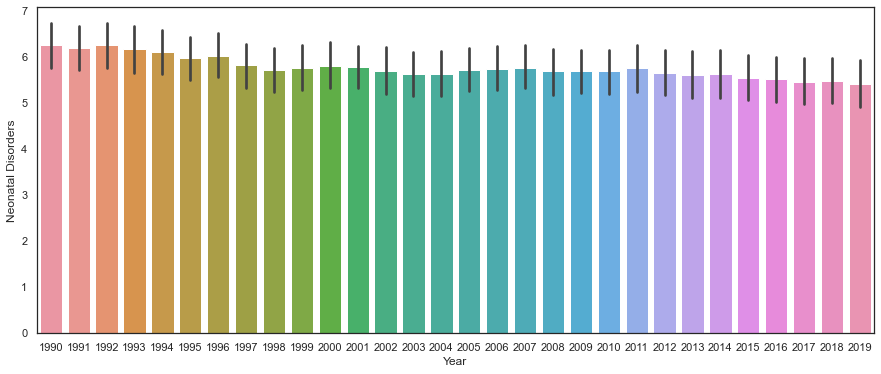

In [169]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Neonatal Disorders', data = df)
print('Min value',df['Neonatal Disorders'].min())
print('Max value',df['Neonatal Disorders'].max())

In [170]:
## Neonatal disorders mean disturbance of normal state of body, organs and abnormal function of a newborn.
## The Neonatal disorders is decreasing along with years. The reason might be growth and fast distribution in medical facilities. 

Max value 9.567776122525363


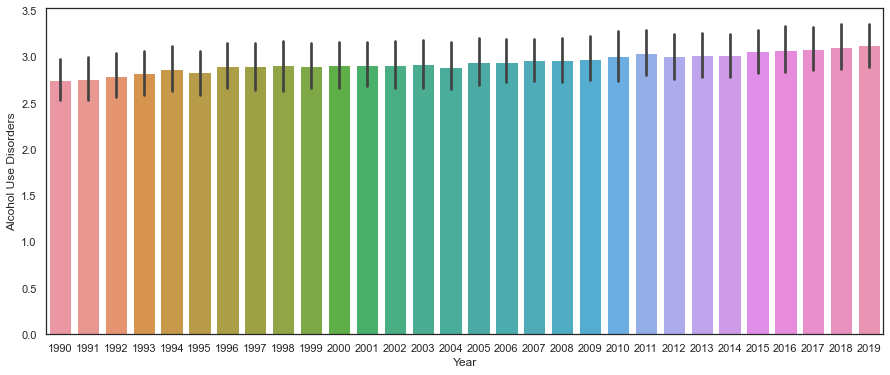

In [171]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Alcohol Use Disorders', data = df)
print('Max value',df['Alcohol Use Disorders'].max())

In [172]:
##Alcohol use disorder is a pattern of alcohol use that involves problems controlling your drinking, being preoccupied with alcohol or continuing to use alcohol even when it causes problems.
## On the basis of given data maximum cases of Alcohol use disorder death is in 2003 to 2008. The graph is increasing since 1990 to 2015 then starts slightly decreasing with time.
 

Max value 13.299248428520253


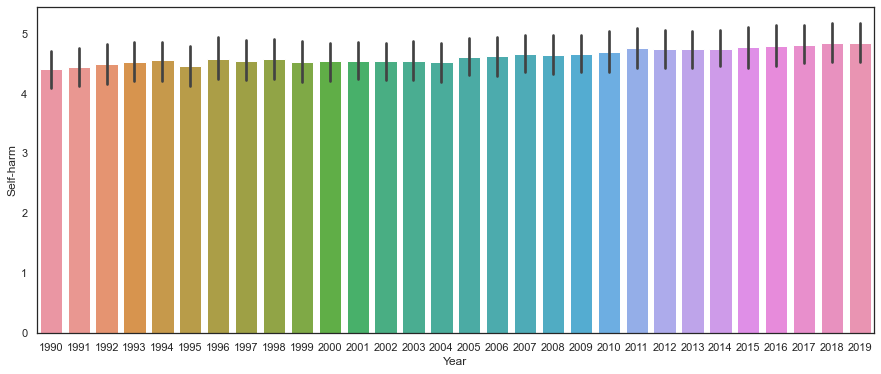

In [173]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Self-harm', data = df)

print('Max value',df['Self-harm'].max())

In [174]:
## Self-harm is intentional behavior that is considered harmful to oneself. 
## The desire to self-harm is a common symptom of some personality disorders.
## People with other mental disorders may also self-harm, including those with depression, anxiety disorders, substance abuse, mood disorders, eating disorders, post-traumatic stress disorder, schizophrenia, dissociative disorders and gender dysphoria.
## On the basis of given data set we can see that death due to suicide or self harm has been slightly increasing from 1990 to 2000 and then it is slightly decreasing with time. 

Max value 5.853518890208148


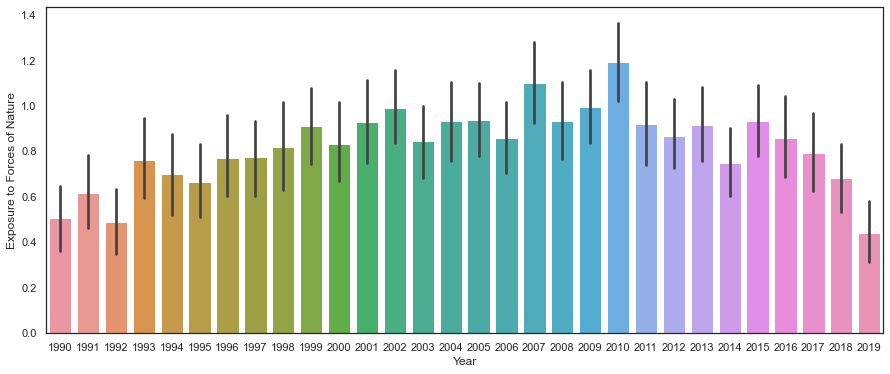

In [175]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Exposure to Forces of Nature', data = df)
print('Max value',df['Exposure to Forces of Nature'].max())

In [231]:
## Exposure to Forces of Nature is force that is beyond human control. This Includes earthquakes, volcanic eruptions, avalanches, storms, lightning strikes, and floods.
## We can easily see that in year 1993, 2004, 2008 and 2010, number of death due to Natural disaster is highiest.

Max value 16.417458065808923


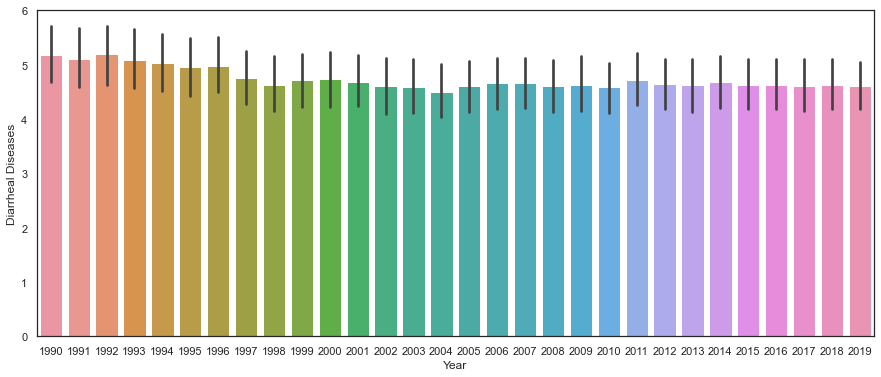

In [177]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Diarrheal Diseases', data = df)
print('Max value',df['Diarrheal Diseases'].max())

In [178]:

## Diarrheal Diseases condition in which faeces are discharged from the bowels frequently and in a liquid form.
## We can see number of people died due to Diarrhea has deceased significantly along with years.

Max value 7.39217859424791


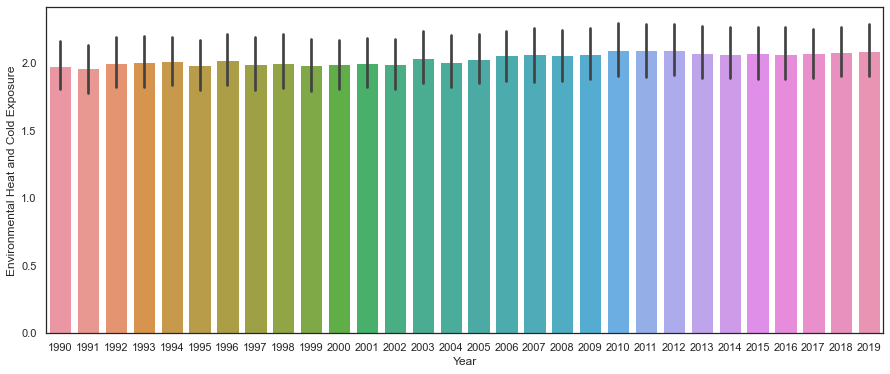

In [179]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Environmental Heat and Cold Exposure', data = df)
print('Max value',df['Environmental Heat and Cold Exposure'].max())

In [232]:
## Environmental Heat and Cold Exposure has no such corelation with years.
##During first few years number of has increased which has started falling for few years then again it has increased then again started falling significantly.


Max value 23.772762342198696


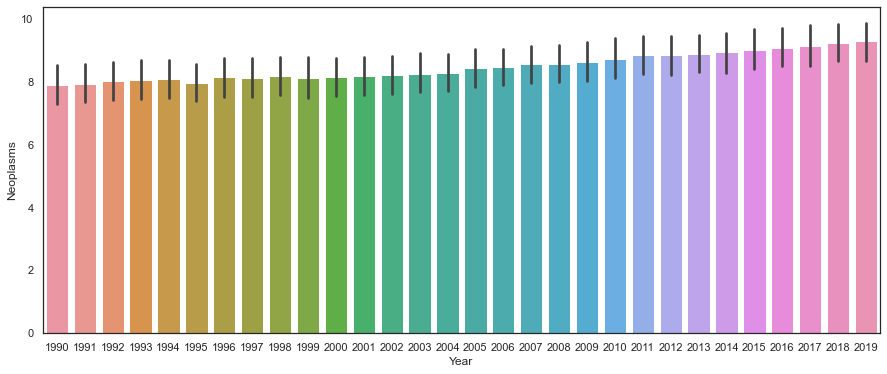

In [181]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Neoplasms', data = df)
print('Max value',df['Neoplasms'].max())

In [233]:
## Neoplasms is a new and abnormal growth of tissue in a part of the body, especially as a characteristic of cancer.
## here are a number of contributing factors that can cause your genes to mutate and result in benign or malignant tumor growth. Common factors include:
## Genetics, age, harmones, smoking, drinking, obesity, sun overexposure, immune,  disorders, viruses, overexposure to radiation, chemical toxins
## We can see no of death due to Neoplasms is significantly increasing with time.


Max value 8.433661577768765


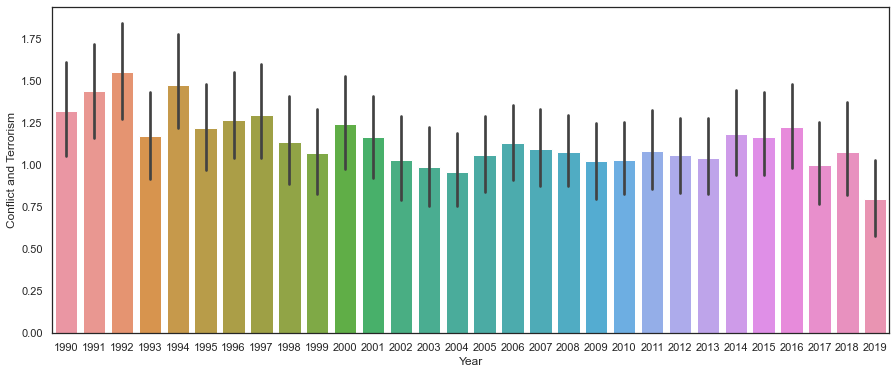

In [183]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Conflict and Terrorism', data = df)
print('Max value',df['Conflict and Terrorism'].max())

In [184]:
## We can see number of death due to Conflict and Terrorism is highiest in year 1994.

Max value 14.953338275091008


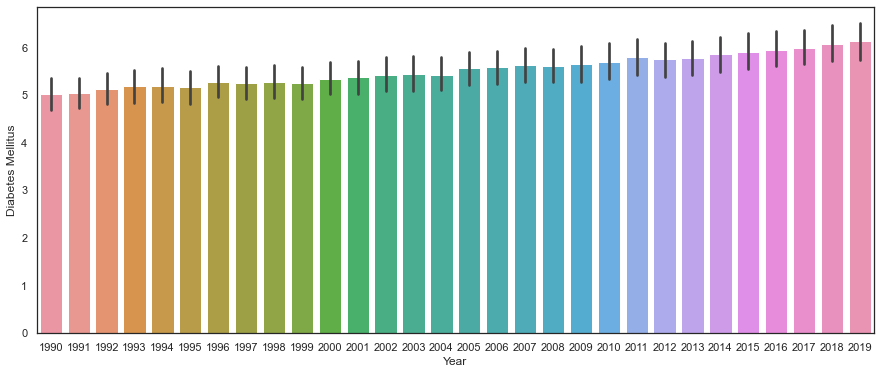

In [185]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Diabetes Mellitus', data = df)
print('Max value',df['Diabetes Mellitus'].max())

In [234]:
## Diabetes mellitus refers to a group of diseases that affect how the body uses blood sugar (glucose). Glucose is an important source of energy for the cells that make up the muscles and tissues.
## The exact cause of most types of diabetes is unknown. In all cases, sugar builds up in the bloodstream. This is because the pancreas doesn't produce enough insulin.
## Both type 1 and type 2 diabetes may be caused by a combination of genetic or environmental factors. 
## We can see increase in number of death with year due to Diabetes mellitus.

Max value 15.2237580704047


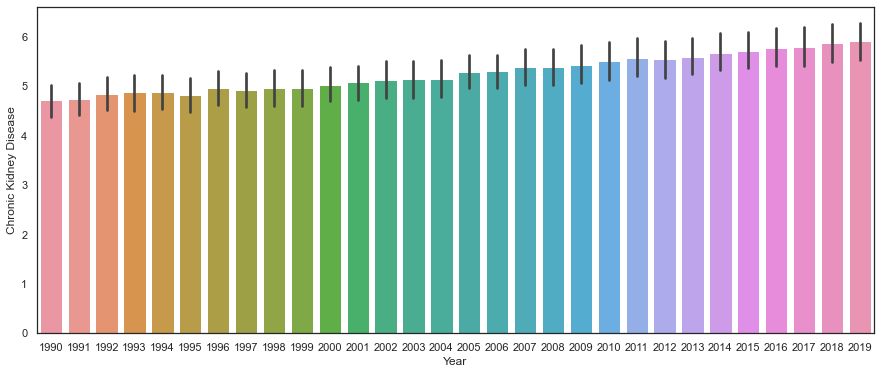

In [187]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Chronic Kidney Disease', data = df)
print('Max value',df['Chronic Kidney Disease'].max())

In [188]:
## Chronic kidney disease is a progressive loss of kidney function over a period of months or years.
##We can see a significant increase in death number with time due to Chronic kidney disease. The reason can be active unhealthy diet , large amount of salt intake , smoking , blood sugar and blood pressure level, diabetes, hypertension, obesity, a family history of CKD.

Max value 7.521206186172788


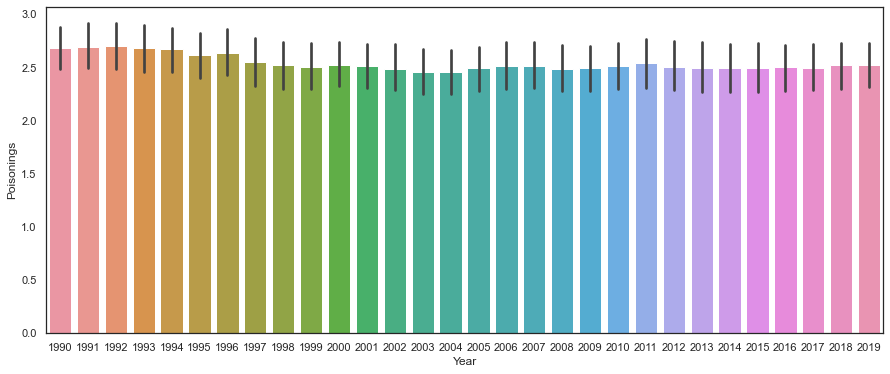

In [189]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Poisonings', data = df)
print('Max value',df['Poisonings'].max())

In [190]:
## There is no as such corelation of death due to poison. But it visible that since 2005 number of death due to poisoning is slightly decreasing with years.

Max value 12.30890229207105


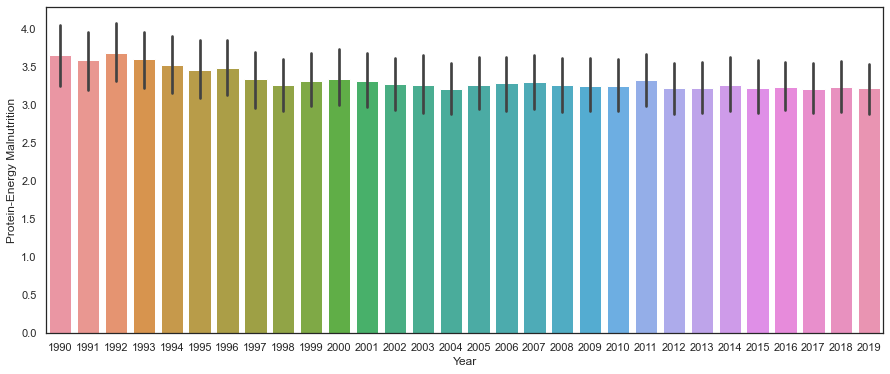

In [191]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Protein-Energy Malnutrition', data = df)
print('Max value',df['Protein-Energy Malnutrition'].max())

In [192]:
## Protein-energy malnutrition or PEM is the condition of lack of energy due to the deficiency of all the macronutrients and many micronutrients.
## Protein-Energy Malnutrition decreasing since 1990 to 1994 and then slightly increased in 1995 then again decreased with year.

Max value 13.594311418906704


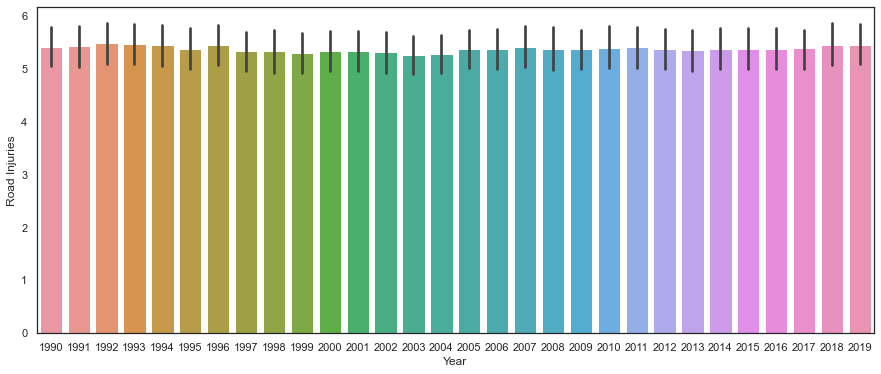

In [193]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Road Injuries', data = df)
print('Max value',df['Road Injuries'].max())

In [194]:
## A traffic accident is defined as an accident involving at least one vehicle on a road open to public traffic in which at least one person is injured or killed.
## A traffic accident is very slightly increasing with years and then sightly decreased with time. 

Max value 16.317395449749966


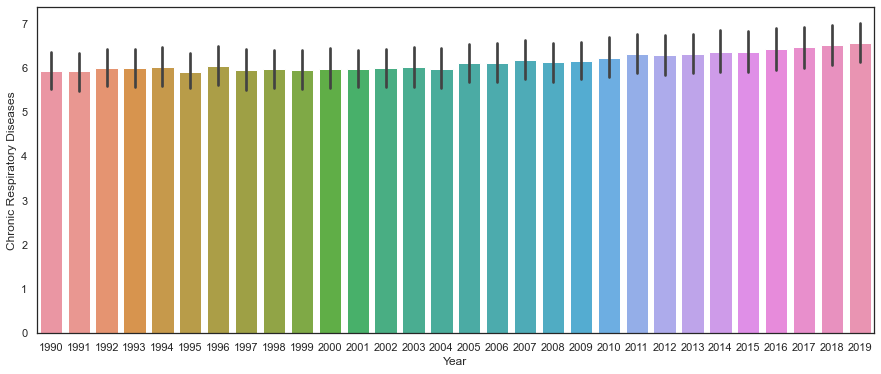

In [195]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Chronic Respiratory Diseases', data = df)
print('Max value',df['Chronic Respiratory Diseases'].max())

In [196]:
## Chronic Respiratory Diseases is increasing with time.


Max value 15.819919543324225


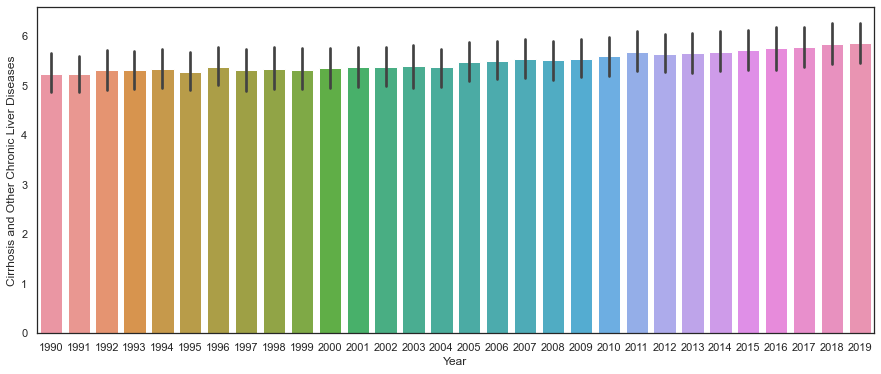

In [197]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Cirrhosis and Other Chronic Liver Diseases', data = df)
print('Max value',df['Cirrhosis and Other Chronic Liver Diseases'].max())

In [198]:
## Cirrhosis is when scar tissue replaces healthy liver tissue. This stops the liver from working normally. Cirrhosis is a long-term (chronic) liver disease. The most common causes are hepatitis and other viruses, and alcohol abuse.
## Cirrhosis death number has increased continously with years.

Max value 16.220028928410873


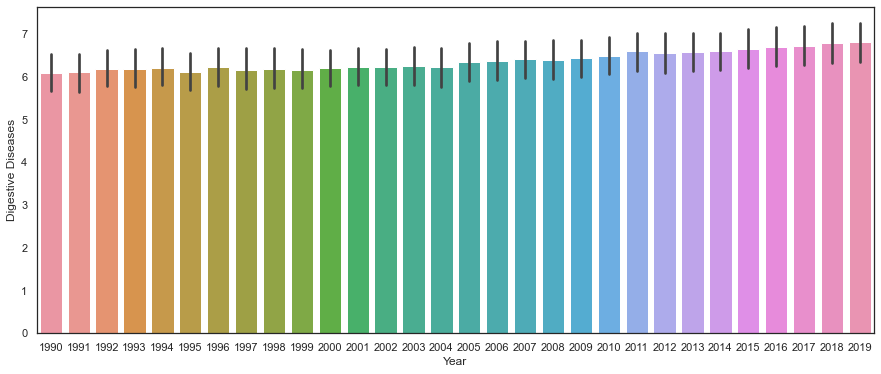

In [199]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Digestive Diseases', data = df)
print('Max value',df['Digestive Diseases'].max())

In [200]:
## Common digestive disorders include gastroesophageal reflux disease, cancer, irritable bowel syndrome, lactose intolerance and hiatal hernia.
## Many factors may upset your GI tract and its motility (ability to keep moving), including:

##Eating a diet low in fiber,Not getting enough exercise,Traveling or other changes in routine,Eating large amounts of dairy products.,Stress.,Resisting the urge to have a bowel movement, possibly because of hemorrhoids.
## Overusing anti-diarrheal medications that, over time, weaken the bowel muscle movements called motility,Taking antacid medicines containing calcium or aluminum,Taking certain medicines (especially antidepressants,iron pills and strong pain medicines such as narcotics),Pregnancy.

Max value 7.779635146039693


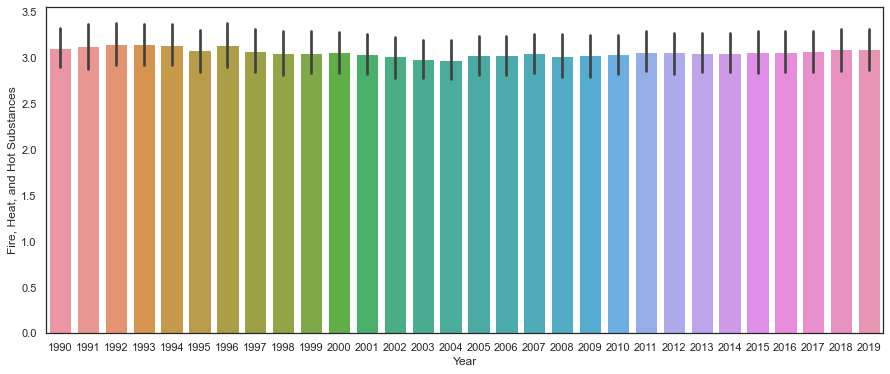

In [201]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Fire, Heat, and Hot Substances', data = df)
print('Max value',df['Fire, Heat, and Hot Substances'].max())

In [202]:
## In initial few years we can see incrase in number of death and then slightly decrease with time.

Max value 8.183528737715344


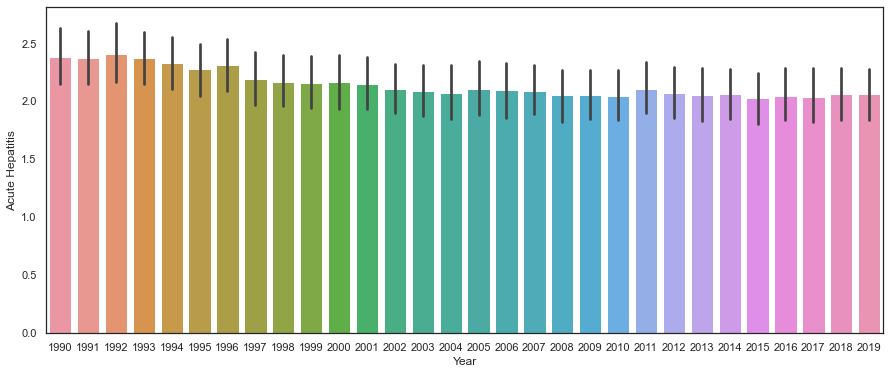

In [203]:
fig = plt.figure(figsize = (15,6))
sns.barplot(x = 'Year', y = 'Acute Hepatitis', data = df)
print('Max value',df['Acute Hepatitis'].max())

In [204]:
## Acute hepatitis is a term used to describe a wide variety of conditions characterized by acute inflammation of the hepatic parenchyma or injury to hepatocytes resulting in elevated liver function indices.
## Acute hepatitis is caused due to heavy alcohol use, toxins, some medications, and certain medical conditions can cause hepatitis. However, hepatitis is often caused by a virus.

In [205]:
print('Correlation of different features of our dataset with years:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['Year'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with years:
Year : 1.0000
Meningitis : -0.0731
Alzheimers Disease and Other Dementias : 0.1271
Parkinsons Disease : 0.1303
Nutritional Deficiencies : 0.0563
Malaria : -0.0234
Drowning : -0.0474
Interpersonal Violence : 0.0394
Maternal Disorders : -0.0232
HIV/AIDS : 0.1103
Drug Use Disorders : 0.1110
Tuberculosis : -0.0301
Cardiovascular Diseases : 0.0587
Lower Respiratory Infections : 0.0003
Neonatal Disorders : -0.0615
Alcohol Use Disorders : 0.0563
Self-harm : 0.0521
Exposure to Forces of Nature : 0.0436
Diarrheal Diseases : -0.0432
Environmental Heat and Cold Exposure : 0.0274
Neoplasms : 0.0960
Conflict and Terrorism : -0.0611
Diabetes Mellitus : 0.1246
Chronic Kidney Disease : 0.1422
Poisonings : -0.0355
Protein-Energy Malnutrition : -0.0471
Road Injuries : -0.0012
Chronic Respiratory Diseases : 0.0590
Cirrhosis and Other Chronic Liver Diseases : 0.0648
Digestive Diseases : 0.0671
Fire, Heat, and Hot Substances : -0.0109
Acute Hepat

In [100]:
## Conclusion:-

##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.
## I get to know what are the disease and either it is positively and negatively coorelated with years. 
## In this project we can see with increase in years diseases which are caused due to smoking, depression, drinking has increased along with time.
## We can see most of the people has died due to Cardiovascular Diseases and Neoplasms.